# Visualização dos Resultados

Importando dependências

In [1]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size':15})

### Definindo a função para exibir a comparação dos resultados
Dado a função estatística, a métrica de desempenho, o tipo do modelo e o nome do diretório dos modelos Base, Linear, Floresta Aletória e Perceptron Multicamadas, exibe os resultado estatístico dos 4 modelos e 2 comparadores, com resultados mínimos e máximos, em função do número de meses anteriores e número de agrupamentos.

In [2]:
def plot_comparison(stat_func, measure, model_type, d_dir, l_dir, rf_dir, mlp_dir):
    
    year = 2019
    months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    n_months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    
    # Carregamento dos dados
    d_scores = np.load('{0}/{1}_{2}.npy'.format(d_dir, year, measure))
    l_scores = np.load('{0}/{1}_{2}.npy'.format(l_dir, year, measure))
    rf_scores = np.load('{0}/{1}_{2}.npy'.format(rf_dir, year, measure))
    mlp_scores = np.load('{0}/{1}_{2}.npy'.format(mlp_dir, year, measure))
    
    # Novos dados de acordo a função estatística
    d = stat_func(d_scores, axis=0)
    l = stat_func(l_scores, axis=0)
    rf = stat_func(rf_scores, axis=0)
    mlp = stat_func(mlp_scores, axis=0)
    
    # Comparacões entre os modelos
    lmin = np.where((measure != 'time') and (d < l), 'MF', 'ML')
    dmin = np.where((measure != 'time') and (d < l), d, l)
    lmin = np.where(dmin < rf, lmin, 'FA')
    dmin = np.where(dmin < rf, dmin, rf)
    lmin = np.where(dmin < mlp, lmin, 'PM')
    k, v = np.unique(lmin, return_counts=True)
    min_dict = dict(zip(k, v))
    cmin = np.vectorize(min_dict.get)(lmin)
    
    lmax = np.where((measure != 'time') and (d > l), 'MF', 'ML')
    dmax = np.where((measure != 'time') and (d > l), d, l)
    lmax = np.where(dmax > rf, lmax, 'FA')
    dmax = np.where(dmax > rf, dmax, rf)
    lmax = np.where(dmax > mlp, lmax, 'PM')
    k, v = np.unique(lmax, return_counts=True)
    max_dict = dict(zip(k, v))
    cmax = np.vectorize(max_dict.get)(lmax)
    
    # Valores mínimos e máximos
    vmin = min(d.min(), l.min(), rf.min(), mlp.min())
    vmax = max(d.max(), l.max(), rf.max(), mlp.max())
    
    # Ajustes dos quadros internos e externos
    fig, ((ax1, ax2), (ax3, ax4), (ax5, ax6)) = plt.subplots(3, 2, sharex=True, sharey=True, figsize=(20, 5))
    ax0 = fig.add_subplot(111, frameon=False)
    
    # Informações dos quadros internos
    ax1 = sns.heatmap(data=[d], ax=ax1, vmin=vmin, vmax=vmax, cbar=False, annot=True, fmt='.2f', yticklabels=False, xticklabels=n_months)
    ax1.set_title('Modelo Fictício')

    ax2 = sns.heatmap(data=[l], ax=ax2, vmin=vmin, vmax=vmax, cbar=False, annot=True, fmt='.2f', yticklabels=False, xticklabels=n_months)
    ax2.set_title('Modelo Linear')
    
    ax3 = sns.heatmap(data=[rf], ax=ax3, vmin=vmin, vmax=vmax, cbar=False, annot=True, fmt='.2f', yticklabels=False, xticklabels=n_months)
    ax3.set_title('Floresta Aleatória')
    
    ax4 = sns.heatmap(data=[mlp], ax=ax4, vmin=vmin, vmax=vmax, cbar=False, annot=True, fmt='.2f', yticklabels=False, xticklabels=n_months)
    ax4.set_title('Perceptron Multicamadas')
    
    ax5 = sns.heatmap(data=[cmin], ax=ax5, vmin=cmin.min(), vmax=cmin.max(), cbar=False, annot=[lmin], fmt='', yticklabels=False, xticklabels=n_months)
    ax5.set_title('Menor Resultado')
    
    ax6 = sns.heatmap(data=[cmax], ax=ax6, vmin=cmax.min(), vmax=cmax.max(), cbar=False, annot=[lmax], fmt='', yticklabels=False, xticklabels=n_months)
    ax6.set_title('Maior Resultado')
    
    # Ajustes do quadro externo
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    ax0.set_xlabel('Número de Meses Anteriores', labelpad=20)
    #ax0.set_ylabel('Número de Agrupamentos', labelpad=20)
    plt.tight_layout()
    plt.savefig('figures/scores_dynamic_{0}_{1}_{2}.png'.format(model_type, measure, stat_func.__name__), dpi=300)
    plt.show()

---
## Resultados dos Regressores

### Acurácia (mínimo)

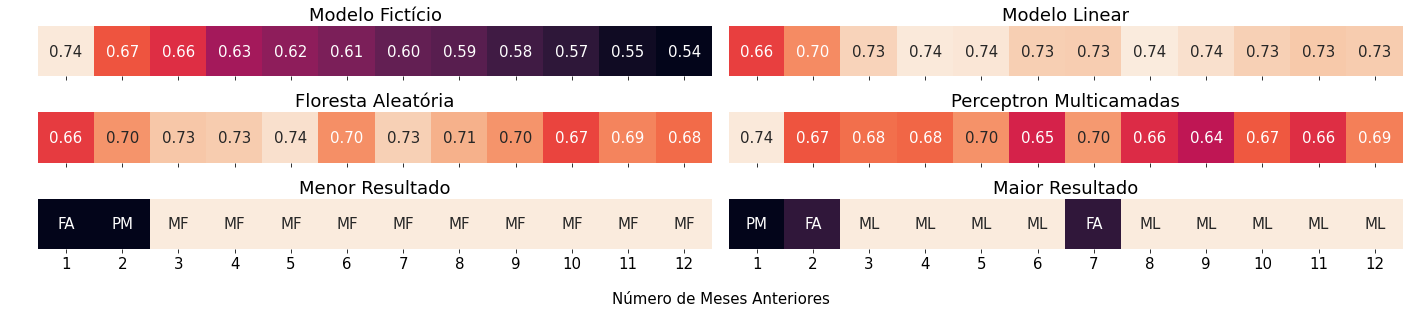

In [3]:
plot_comparison(np.min, 'accuracy', 'regressors', 'scores_dynamic_dr', 'scores_dynamic_lr', 'scores_dynamic_rfr', 'scores_dynamic_mlpr')

### Acurácia (média)

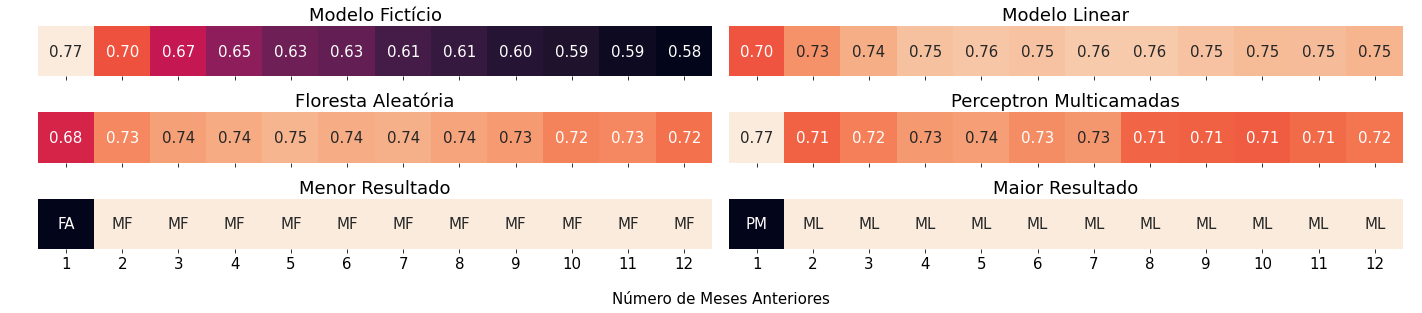

In [4]:
plot_comparison(np.mean, 'accuracy', 'regressors', 'scores_dynamic_dr', 'scores_dynamic_lr', 'scores_dynamic_rfr', 'scores_dynamic_mlpr')

### Acurácia (desvio padrão)

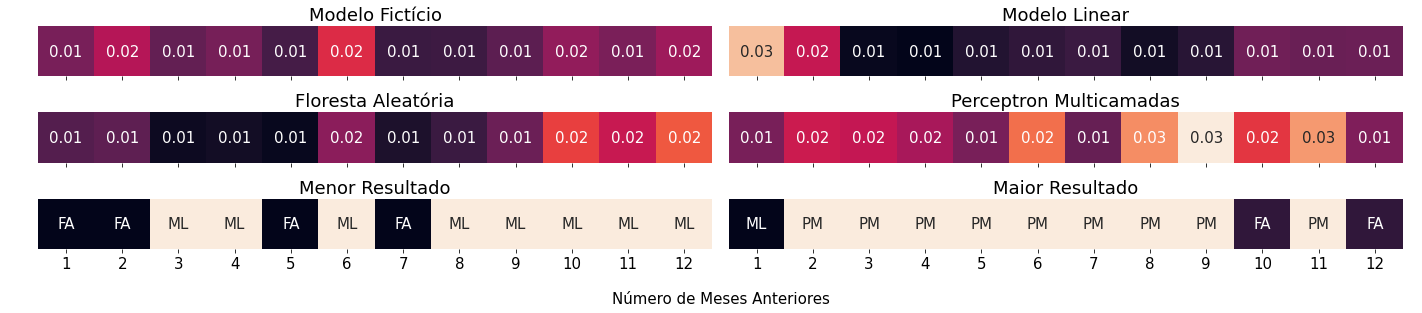

In [5]:
plot_comparison(np.std, 'accuracy', 'regressors', 'scores_dynamic_dr', 'scores_dynamic_lr', 'scores_dynamic_rfr', 'scores_dynamic_mlpr')

### Medida F<sub>1</sub> (mínimo)

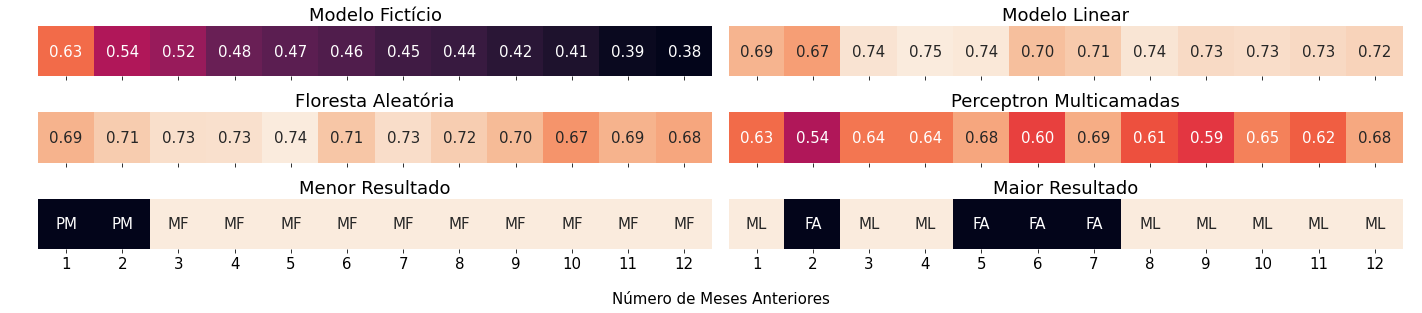

In [6]:
plot_comparison(np.min, 'f1', 'regressors', 'scores_dynamic_dr', 'scores_dynamic_lr', 'scores_dynamic_rfr', 'scores_dynamic_mlpr')

### Medida F<sub>1</sub> (média)

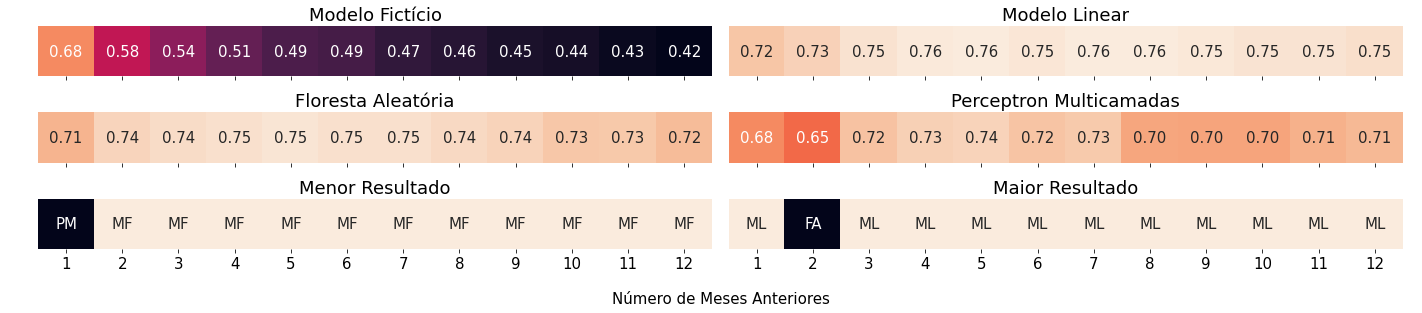

In [7]:
plot_comparison(np.mean, 'f1', 'regressors', 'scores_dynamic_dr', 'scores_dynamic_lr', 'scores_dynamic_rfr', 'scores_dynamic_mlpr')

### Medida F<sub>1</sub> (desvio padrão)

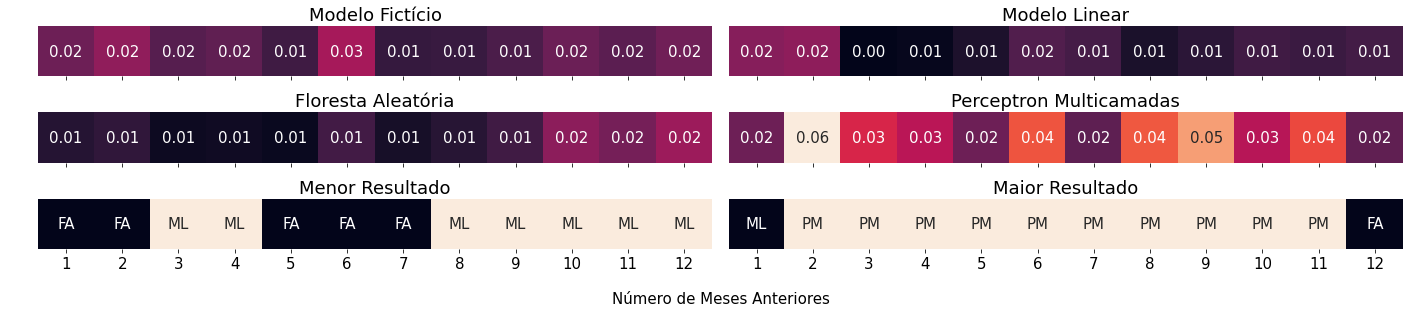

In [8]:
plot_comparison(np.std, 'f1', 'regressors', 'scores_dynamic_dr', 'scores_dynamic_lr', 'scores_dynamic_rfr', 'scores_dynamic_mlpr')

### Complexidade Computacional (máximo)

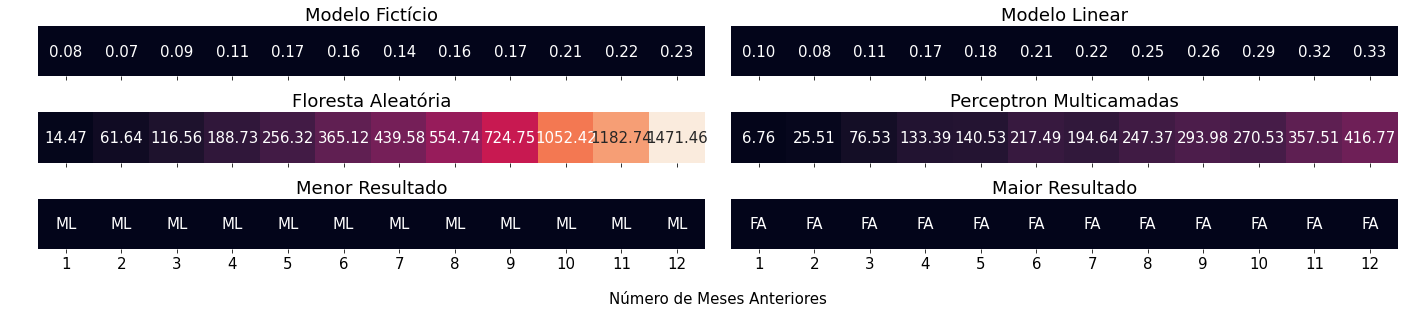

In [9]:
plot_comparison(np.max, 'time', 'regressors', 'scores_dynamic_dr', 'scores_dynamic_lr', 'scores_dynamic_rfr', 'scores_dynamic_mlpr')

### Complexidade Computacional (média)

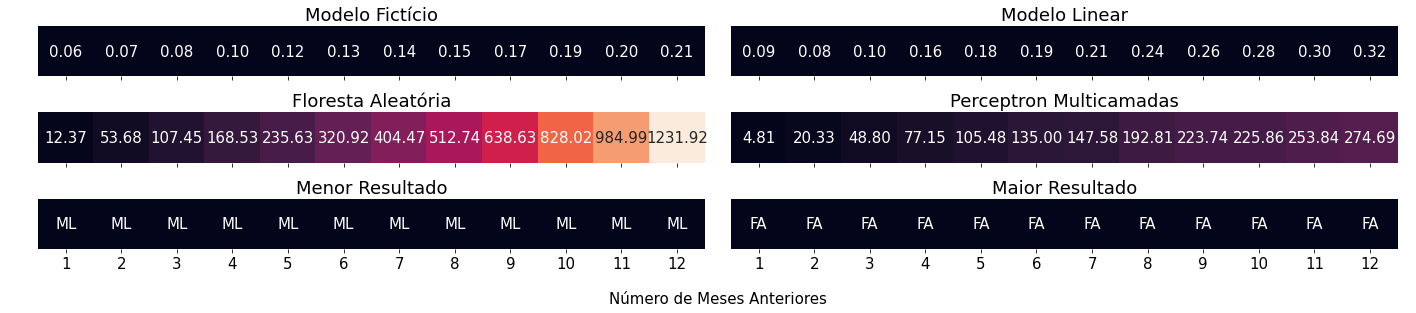

In [10]:
plot_comparison(np.mean, 'time', 'regressors', 'scores_dynamic_dr', 'scores_dynamic_lr', 'scores_dynamic_rfr', 'scores_dynamic_mlpr')

### Complexidade Computacional (desvio padrão)

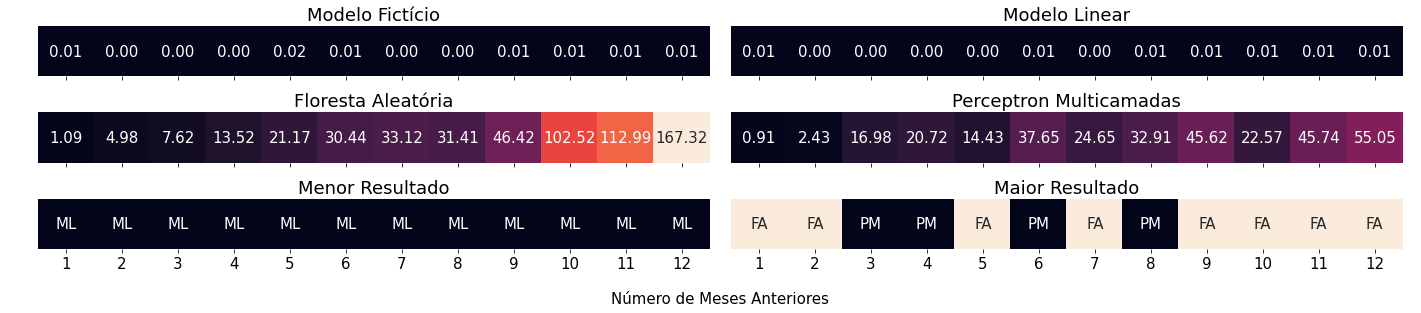

In [11]:
plot_comparison(np.std, 'time', 'regressors', 'scores_dynamic_dr', 'scores_dynamic_lr', 'scores_dynamic_rfr', 'scores_dynamic_mlpr')

---
## Resultados dos Classificadores

### Acurácia (mínimo)

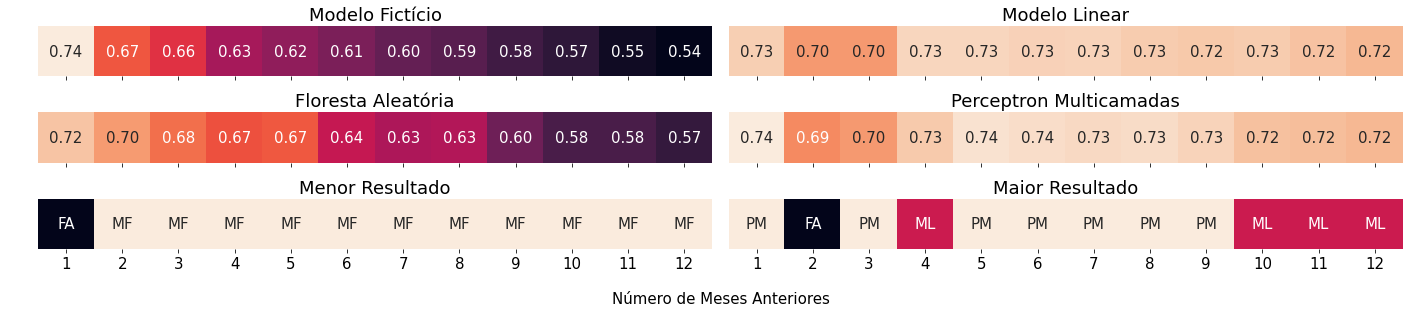

In [12]:
plot_comparison(np.min, 'accuracy', 'classifiers', 'scores_dynamic_dc', 'scores_dynamic_lrc', 'scores_dynamic_rfc', 'scores_dynamic_mlpc')

### Acurácia (média)

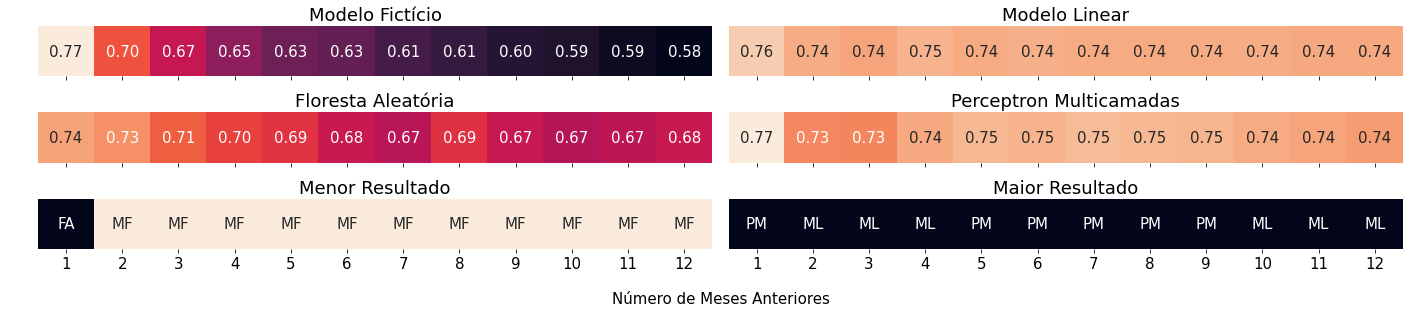

In [13]:
plot_comparison(np.mean, 'accuracy', 'classifiers', 'scores_dynamic_dc', 'scores_dynamic_lrc', 'scores_dynamic_rfc', 'scores_dynamic_mlpc')

### Acurácia (desvio padrão)

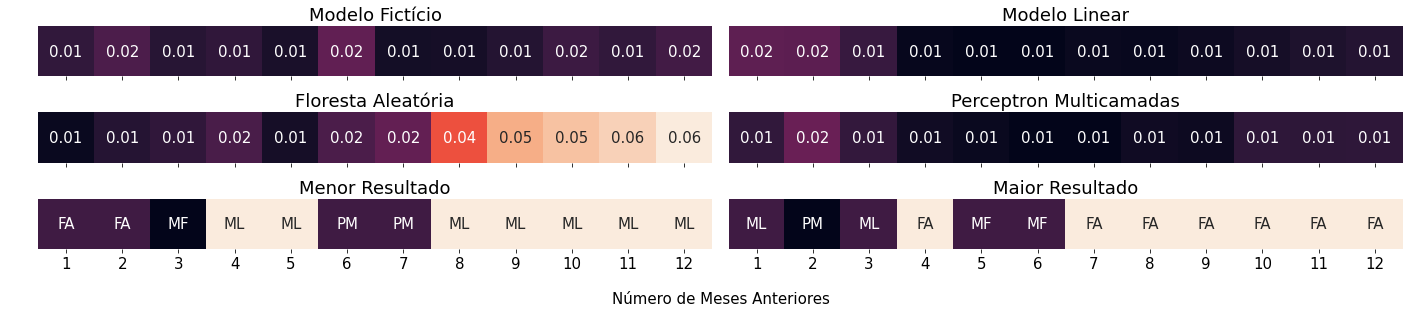

In [14]:
plot_comparison(np.std, 'accuracy', 'classifiers', 'scores_dynamic_dc', 'scores_dynamic_lrc', 'scores_dynamic_rfc', 'scores_dynamic_mlpc')

### Medida F<sub>1</sub> (mínimo)

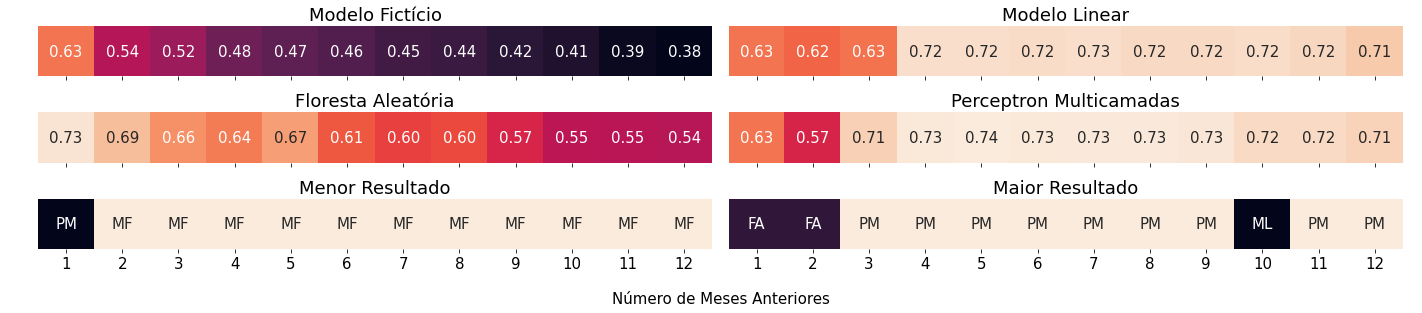

In [15]:
plot_comparison(np.min, 'f1', 'classifiers', 'scores_dynamic_dc', 'scores_dynamic_lrc', 'scores_dynamic_rfc', 'scores_dynamic_mlpc')

### Medida F<sub>1</sub> (média)

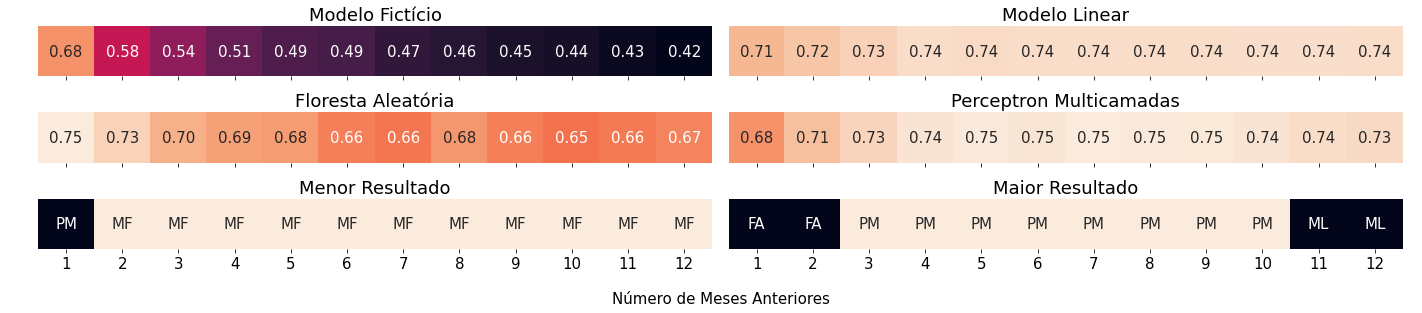

In [16]:
plot_comparison(np.mean, 'f1', 'classifiers', 'scores_dynamic_dc', 'scores_dynamic_lrc', 'scores_dynamic_rfc', 'scores_dynamic_mlpc')

### Medida F<sub>1</sub> (desvio padrão)

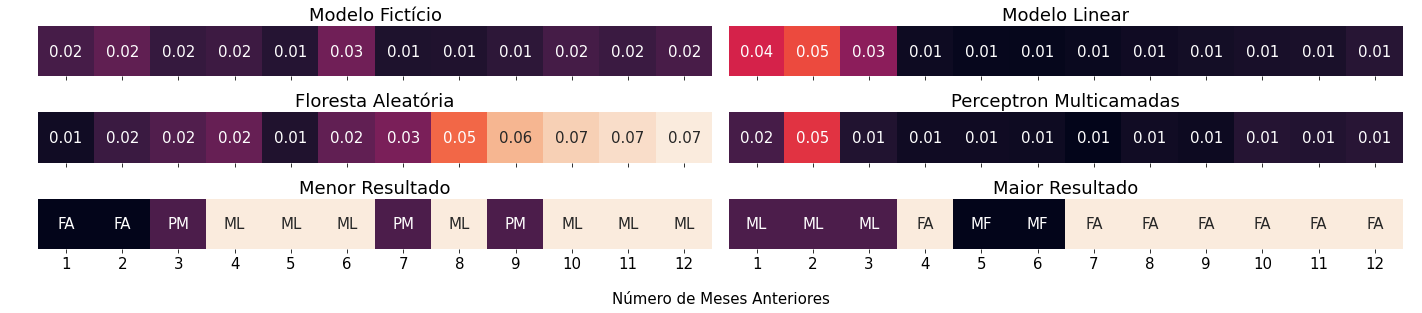

In [17]:
plot_comparison(np.std, 'f1', 'classifiers', 'scores_dynamic_dc', 'scores_dynamic_lrc', 'scores_dynamic_rfc', 'scores_dynamic_mlpc')

### Complexidade Computacional (máximo)

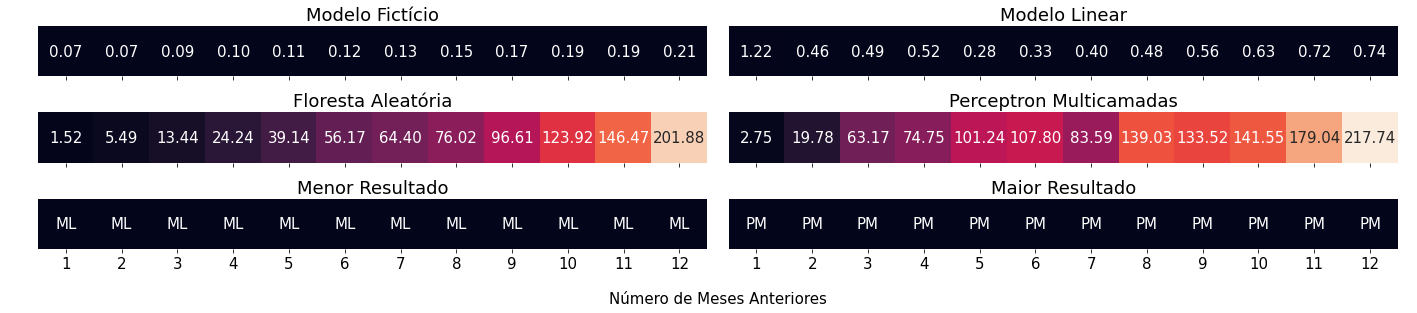

In [18]:
plot_comparison(np.max, 'time', 'classifiers', 'scores_dynamic_dc', 'scores_dynamic_lrc', 'scores_dynamic_rfc', 'scores_dynamic_mlpc')

### Complexidade Computacional (média)

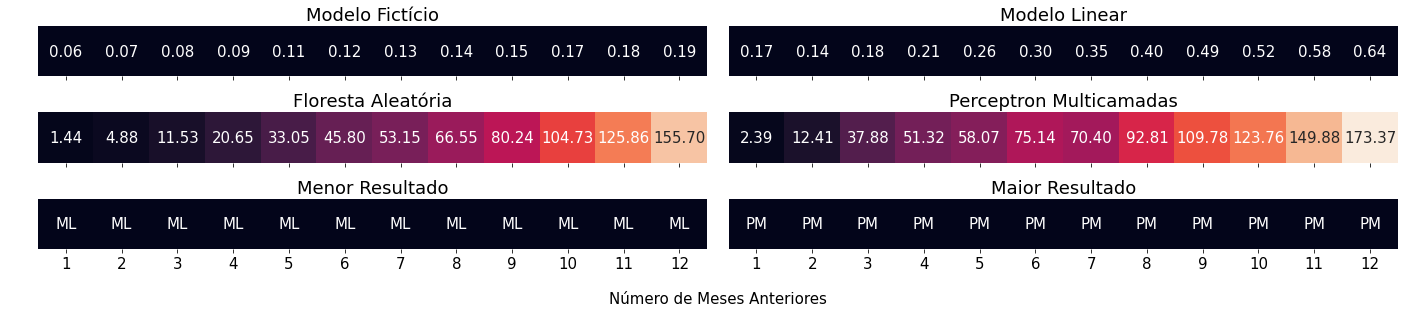

In [19]:
plot_comparison(np.mean, 'time', 'classifiers', 'scores_dynamic_dc', 'scores_dynamic_lrc', 'scores_dynamic_rfc', 'scores_dynamic_mlpc')

### Complexidade Computacional (desvio padrão)

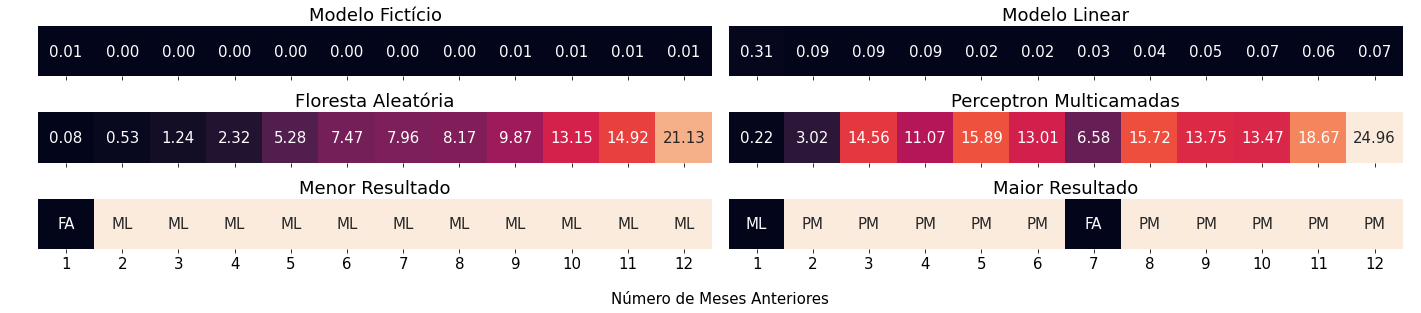

In [20]:
plot_comparison(np.std, 'time', 'classifiers', 'scores_dynamic_dc', 'scores_dynamic_lrc', 'scores_dynamic_rfc', 'scores_dynamic_mlpc')

---
## Melhor abordagem

In [21]:
def plot_comparison_regressor_classifier(stat_func, measure, regressor_dir, classifier_dir):
    
    year = 2019
    months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    n_months = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
    
    # Carregamento dos dados
    r_scores = np.load('{0}/{1}_{2}.npy'.format(regressor_dir, year, measure))
    c_scores = np.load('{0}/{1}_{2}.npy'.format(classifier_dir, year, measure))
    
    # Novos dados de acordo a função estatística
    r = stat_func(r_scores, axis=0)
    c = stat_func(c_scores, axis=0)
    
    # Comparacões entre os modelos
    lmin = np.where(r < c, 'R', 'C')
    k, v = np.unique(lmin, return_counts=True)
    min_dict = dict(zip(k, v))
    cmin = np.vectorize(min_dict.get)(lmin)
    
    lmax = np.where(r > c, 'R', 'C')
    k, v = np.unique(lmax, return_counts=True)
    max_dict = dict(zip(k, v))
    cmax = np.vectorize(max_dict.get)(lmax)
    
    # Valores mínimos e máximos
    vmin = min(r.min(), c.min())
    vmax = max(r.max(), c.max())
    
    # Ajustes dos quadros internos e externos
    fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, sharex=True, sharey=True, figsize=(20, 4))
    ax0 = fig.add_subplot(111, frameon=False)
    
    # Informações dos quadros internos
    ax1 = sns.heatmap(data=[r], ax=ax1, vmin=vmin, vmax=vmax, cbar=False, annot=True, fmt='.2f', yticklabels=False, xticklabels=n_months)
    ax1.set_title('Regressor')

    ax2 = sns.heatmap(data=[c], ax=ax2, vmin=vmin, vmax=vmax, cbar=False, annot=True, fmt='.2f', yticklabels=False, xticklabels=n_months)
    ax2.set_title('Classificador')
    
    ax3 = sns.heatmap(data=[cmin], ax=ax3, vmin=cmin.min(), vmax=cmin.max(), cbar=False, annot=[lmin], fmt='', yticklabels=False, xticklabels=n_months)
    ax3.set_title('Menor Resultado')
    
    ax4 = sns.heatmap(data=[cmax], ax=ax4, vmin=cmax.min(), vmax=cmax.max(), cbar=False, annot=[lmax], fmt='', yticklabels=False, xticklabels=n_months)
    ax4.set_title('Maior Resultado')
    
    # Ajustes do quadro externo
    plt.tick_params(labelcolor='none', top=False, bottom=False, left=False, right=False)
    ax0.set_xlabel('Número de Meses Anteriores', labelpad=20)
    plt.tight_layout()
    plt.savefig('figures/scores_dynamic_{0}_{1}.png'.format(measure, stat_func.__name__), dpi=300)
    plt.show()

### Acurácia (média)

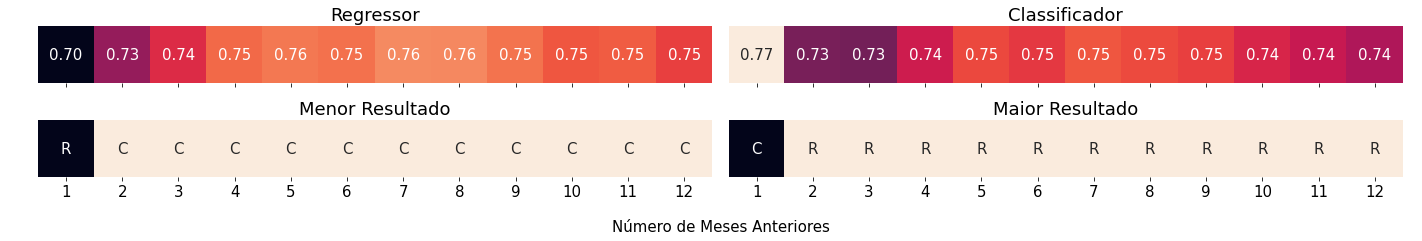

In [22]:
plot_comparison_regressor_classifier(np.mean, 'accuracy', 'scores_dynamic_lr', 'scores_dynamic_mlpc')

### Medida F<sub>1</sub> (média)

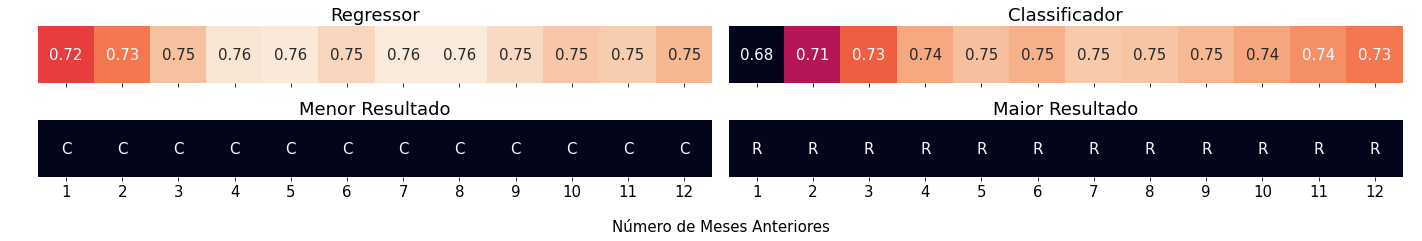

In [23]:
plot_comparison_regressor_classifier(np.mean, 'f1', 'scores_dynamic_lr', 'scores_dynamic_mlpc')

### Complexidade Computacional (média)

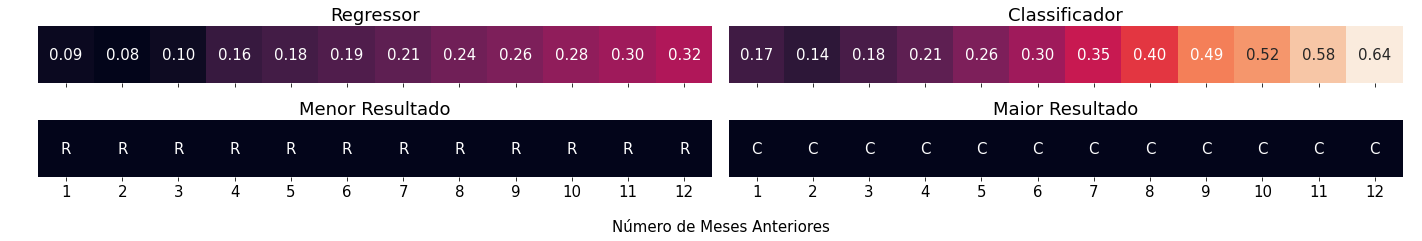

In [24]:
plot_comparison_regressor_classifier(np.mean, 'time', 'scores_dynamic_lr', 'scores_dynamic_lrc')